**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [3]:
# This is the imports of packages we use
import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

# Autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [4]:
# We extract our class from the py-file
from examproject import problem1

In [5]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [6]:
# We call our class and name it 'model'
model = problem1(par)

# We set the linspaces
p1_vals = np.linspace(0.1, 2.0, 10)
p2_vals = np.linspace(0.1, 2.0, 10)

# We call the function that solves the problem
model.check_market_clearing(p1_vals, p2_vals)

No pairs found where markets clear.


The code presented above indicates that no markets clear given our $10^2=100$ price combinations within the tested range.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [7]:
# We extract the relevant variables and print the results
p1_eq, p2_eq = model.find_equilibrium_prices()
print(f"Equilibrium prices found: p1 = {p1_eq:.5f}, p2 = {p2_eq:.5f}")

Equilibrium prices found: p1 = 0.97593, p2 = 1.49076


We find that the equilibrium prices $p_1^*=0.97593$ and $p_2^*=1.49076$ clear both the labor market and market for good 1 - and by Walras' Law (hint), the third market (market for good 2) will also clear, such that overall market clears. The consumers' preference for good 2 ($\alpha=0.3$) explains the relative higher price for good 2.

We will below sketch the market clearing for both prices:

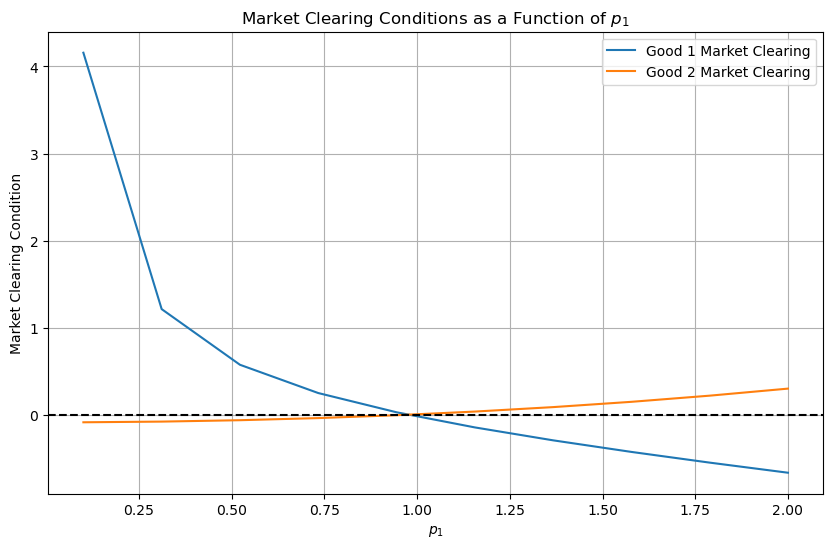

In [8]:
# We plot the market clearing
model.plot_market_clearing_p1(p1_vals, p2_eq)

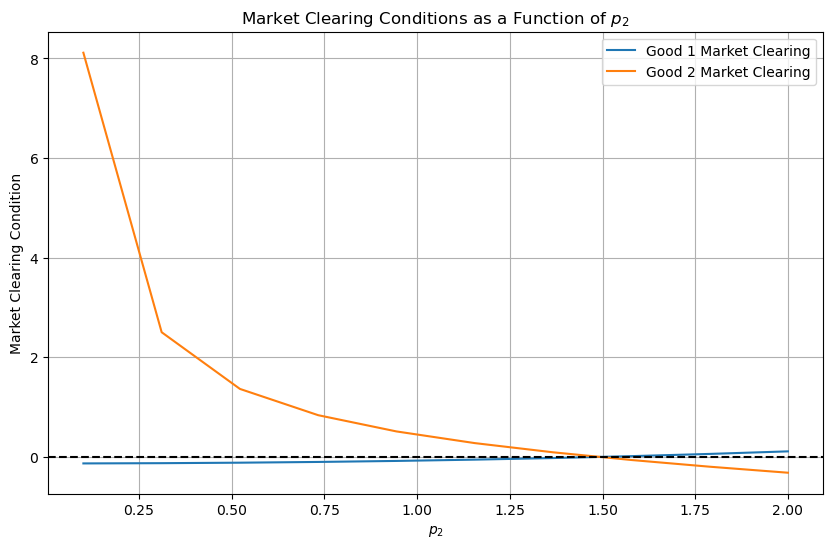

In [7]:
# We plot the market clearing
model.plot_market_clearing_p2(p1_eq, p2_vals)

In [8]:
# We call the function that solves the problem
prices = [p1_eq,p2_eq]
model.market_clearing_conditions(prices)

[3.1635805086693836e-13, 4.838351941316432e-13]

The above code confirms that both markets clear for the equilibrium prices. The market clearing conditions are $c_1^*-y_1^*$ and $c_2^*-y_2^*$. They clearly clear given their values of 0 and 0. 

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [9]:
# This code is generated with assistance of AI (ChatGPT). We had problems implementing it in the py-file, so here it is. For each step we refer to the py-file.
class question1_3: 
    def __init__(self, par):
        self.par = par

    def firm_behavior(self, p_j, w): 
        A, gamma = self.par.A, self.par.gamma
        ell_j_star = (p_j * A * gamma / w) ** (1 / (1 - gamma))
        y_j_star = A * (ell_j_star) ** gamma
        pi_j_star = (1 - gamma) / gamma * w * (p_j * A * gamma / w) ** (1 / (1 - gamma))
        return ell_j_star, y_j_star, pi_j_star

    def consumer_behavior(self, p1, p2, w, tau, T):
        _, _, pi1_star = self.firm_behavior(p1, w)
        _, _, pi2_star = self.firm_behavior(p2, w)
        profits = pi1_star + pi2_star
        budget = lambda ell: w * ell + T + profits
        c1 = lambda ell: self.par.alpha * budget(ell) / p1
        c2 = lambda ell: (1 - self.par.alpha) * budget(ell) / (p2 + tau)
        utility = lambda ell: np.log(c1(ell) ** self.par.alpha * c2(ell) ** (1 - self.par.alpha)) - self.par.nu * ell ** (1 + self.par.epsilon) / (1 + self.par.epsilon)
        ell_star = self.optimize_labor(utility)
        return c1(ell_star), c2(ell_star), ell_star

    def optimize_labor(self, utility):
        res = minimize_scalar(lambda ell: -utility(ell), bounds=(0, 100), method='bounded')
        return res.x

    def c1(self, l):
        return self.par.alpha * (self.par.w * l + self.par.T + self.pi_star(self.par.w, self.par.p1) + self.pi_star(self.par.w, self.par.p2)) / self.par.p1

    def c2(self, l):
        return (1 - self.par.alpha) * (self.par.w * l + self.par.T + self.pi_star(self.par.w, self.par.p1) + self.pi_star(self.par.w, self.par.p2)) / (self.par.p2 + self.par.tau)

    def consumer_utility(self, c1, c2, l):
        return np.log(c1**self.par.alpha * c2**(1 - self.par.alpha)) - self.par.nu * (l**(1 + self.par.epsilon)) / (1 + self.par.epsilon)

    # Defining the SWF
    def social_welfare(self):
        # Initialization 
        l_star = self.optimal_behavior()
        c1_star = self.c1(l_star)
        c2_star = self.c2(l_star)
        # Function
        utility = self.consumer_utility(c1_star, c2_star, l_star)
        return utility - self.par.kappa * c2_star

    # Defining the SWF with tau
    def swf_with_tax(self, tau):
        # Initialization
        self.par.tau = tau
        self.par.T = tau * self.c2(self.optimal_behavior())
        return -self.social_welfare() # Negative since we will minimize in the next step

    def find_optimal_tax(self):
        # Optimizing the function
        result = minimize_scalar(self.swf_with_tax, bounds=(0, 2), method='bounded')
        # If we are succesfull we store the results (tau and T) - else, we will get an error
        if result.success:
            self.par.tau = result.x
            self.par.T = self.par.tau * self.c2(self.optimal_behavior())
        else:
            raise ValueError("Optimization failed")

    def pi_star(self, w, p):
        return (1 - self.par.gamma) / self.par.gamma * w * ((p * self.par.A * self.par.gamma) / w)**(1 / (1 - self.par.gamma))

    def optimal_behavior(self):
        return ((self.par.p1 * self.par.A * self.par.gamma) / self.par.w)**(1 / (1 - self.par.gamma))

# Parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1
par.w = 1.0
par.p1 = p1_eq
par.p2 = p2_eq
par.T = 0 

# Calling the class and finding the optimal tax
model = question1_3(par)
model.find_optimal_tax()

# Compute tau, T and SWF
tau, T = model.par.tau, model.par.T
swf = model.social_welfare()

# Displaying the three findings
tau, T, swf

(0.4721359549995794, 0.20890029964265383, -0.908710477168788)

We find that values of $\tau$ and $T$ that maximise the social welfare function to be $0.47$ and $0.21$, respectively. With these values, the SWF will be $-0.91$.

We recognize that we get a negative SWF. The SWF consists of two parts: the consumer's utility and the social cost of CO2 emissions from the production of the second good. Since the SWF is negative, it indicates that the social costs exceed the utility gains, leading to a welfare loss. 

Despite this, the government budget constraint $(T=\tau*y^*_2 \Leftrightarrow T=\tau*c^*_2(\ell^*)\Leftrightarrow T=\tau*c^*_2)$ is satisfied as $T=\tau*c^*_2$ equals $0.209= 0.47*0.44 \Leftrightarrow 0.21=0.21$

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [11]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [12]:
# We extract our class from the py-file
from examproject import problem2

In [17]:
# We call the class, problem2, 'sim'
sim = problem2(par.J, par.N, par.K, par.sigma, par.v, par.c)

# We execute the simulation-function  
sim.simulate()

# We extract the relevant variables
expected_utility, avg_realized_utility = sim.simulate()
    
# We print results
for j in range(par.J):
    print(f"For Career {j+1}:")
    print(f"Expected Utility: {expected_utility[j]:.5f}")
    print(f"Average Realized Utility: {avg_realized_utility[j]:.5f}\n")


For Career 1:
Expected Utility: 0.99658
Average Realized Utility: 0.99658

For Career 2:
Expected Utility: 1.98999
Average Realized Utility: 1.98999

For Career 3:
Expected Utility: 2.99662
Average Realized Utility: 2.99662



The expected utilities are approximately $1.00$, $2.00$ and  $3.00$ for career track 1, 2 and 3, respectively based on the simulation with $10,000$ draws. Intuitively, it makes sense that the exp. utilities are close to the value $v$ as the error term is normally distributed with mean = 0.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [18]:
# We execute the relevant functions
sim.simulate_2()
sim.calculate_statistics()

# We extract the relevant variables
avg_subjective_utility_df = sim.average_subjective_expected_utility
avg_realized_utility_df = sim.average_ex_post_realized_utility

In [19]:
sim.share_graduates_choosing_career

Chosen Career,1,2,3
Graduate,,,
1,0.1506,0.3009,0.5485
2,0.0962,0.2746,0.6292
3,0.0677,0.2451,0.6872
4,0.0478,0.2232,0.7290
5,0.0329,0.1970,0.7701
6,0.0246,0.1883,0.7871
7,0.0169,0.1705,0.8126
8,0.0138,0.1538,0.8324
9,0.0099,0.1472,0.8429


In [20]:
print(avg_subjective_utility_df)

Graduate
1     3.916765
2     3.476096
3     3.336118
4     3.235321
5     3.172033
6     3.139282
7     3.105329
8     3.089818
9     3.066925
10    3.056166
Name: Prior Expected Utility, dtype: float64


In [21]:
print(avg_realized_utility_df)

Graduate
1     2.455174
2     2.523703
3     2.623042
4     2.704575
5     2.754498
6     2.745181
7     2.845156
8     2.859079
9     2.820646
10    2.856297
Name: Realized Utility, dtype: float64


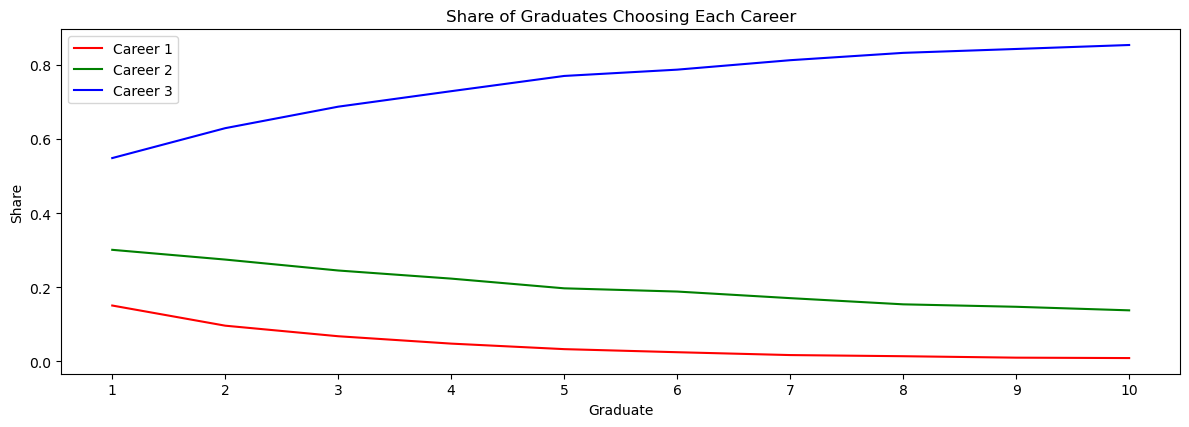

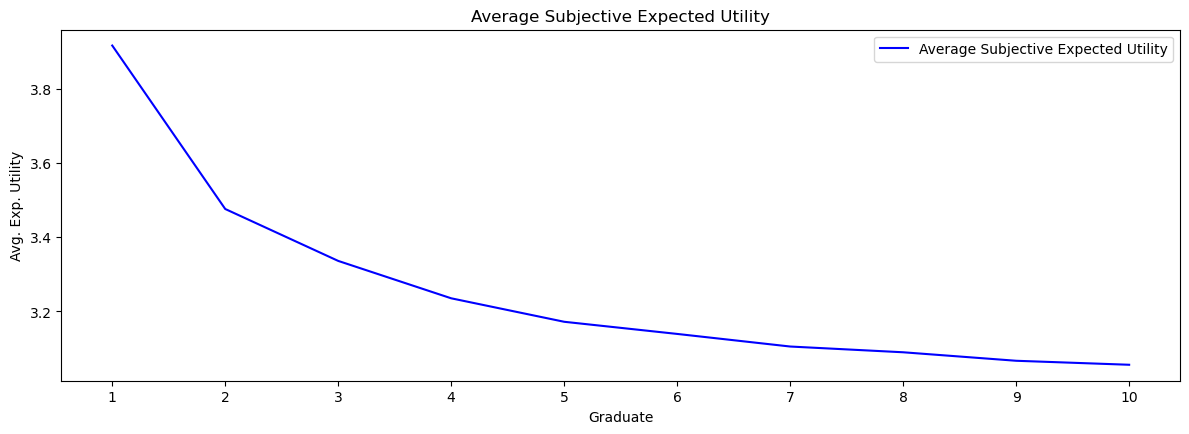

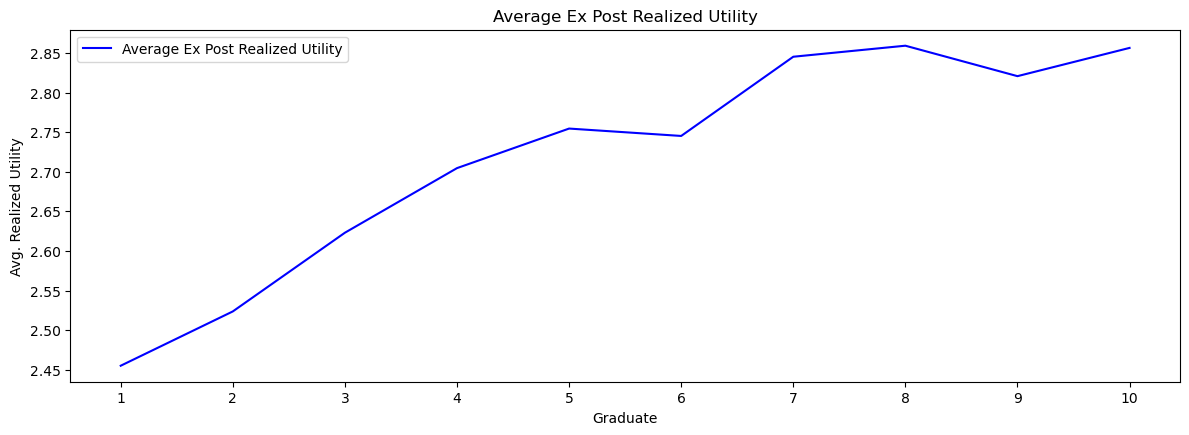

In [22]:
sim.visualize_results()

The results are visually presented in the three graphs above. The first graph shows that across all graduates, career track 3 is the most common given the higher utility $v=3$. The upper graph also illustrates that graduates with more friends (hence better informed graduates) are more likely to choose career track 3. The reverse trend is true for the two other curves. 

For the middle graph it is shown that expected utility decreases as the number of friends increases. Again, intuitively this makes sense, as more friends will lead to a more accurate utility (the expected utility will converge towards realised utility when number of friends increases). For graduate 1 or 2 with 1 and 2 friends, respectively, the error terms in their utility function might positively (negative) bias the actual utility, leading to a possibly much larger (lower) expected utility.

Finally, the bottom figure illustrates that graduates with more friends are better informed and hence more likely to choose career track 3, thus gaining a higher realised utility. This result correlates with the results from the upper figure - that better informed graduates (more friends) are more likely to choose career track 3.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [23]:
# Again, we execute relevant function
sim.simulate_3()
sim.calculate_statistics()

In [24]:
print(sim.share_graduates_choosing_career_switching) 

New Chosen Career       1       2       3
Graduate                                 
1                  0.1424  0.2960  0.5616
2                  0.0993  0.2780  0.6227
3                  0.0748  0.2518  0.6734
4                  0.0591  0.2535  0.6874
5                  0.0455  0.2365  0.7180
6                  0.0406  0.2236  0.7358
7                  0.0343  0.2169  0.7488
8                  0.0264  0.2121  0.7615
9                  0.0259  0.2118  0.7623
10                 0.0235  0.2080  0.7685


In [25]:
print(sim.average_subjective_expected_utility_switching)

Graduate
1     3.916765
2     3.476096
3     3.336118
4     3.235321
5     3.172033
6     3.139282
7     3.105329
8     3.089818
9     3.066925
10    3.056166
Name: Prior Expected Utility, dtype: float64


In [26]:
print(sim.average_ex_post_realized_utility_switching)

Graduate
1     2.996027
2     3.050088
3     3.135171
4     3.177161
5     3.197130
6     3.232841
7     3.271346
8     3.263850
9     3.261494
10    3.269087
Name: New Realized Utility, dtype: float64


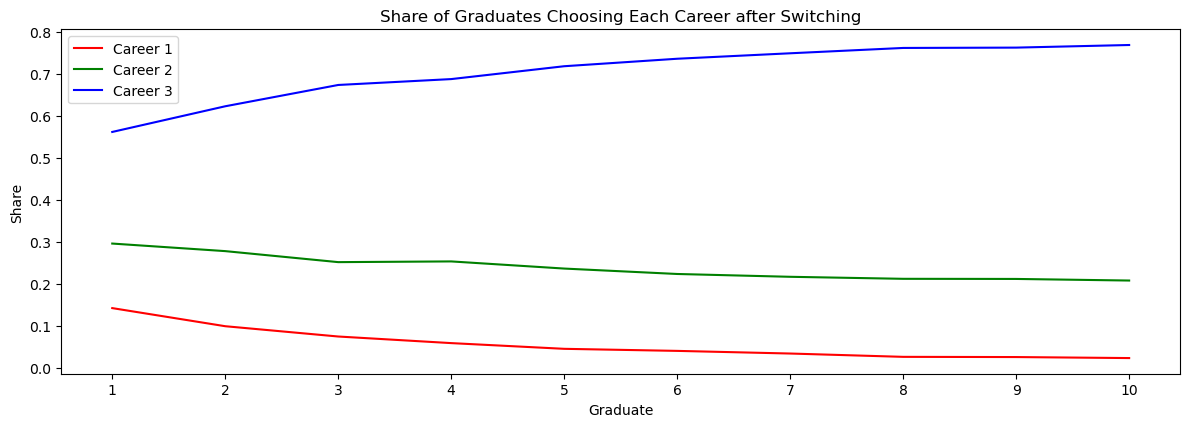

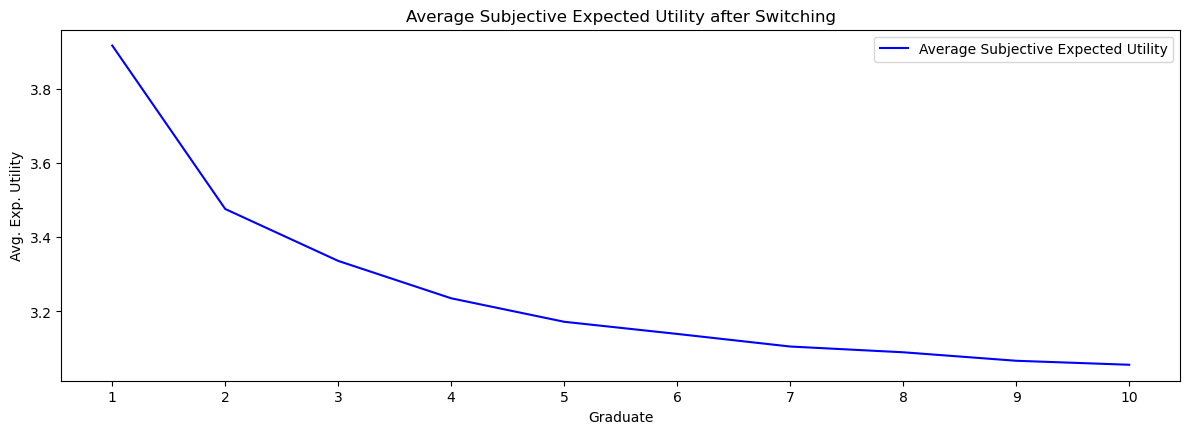

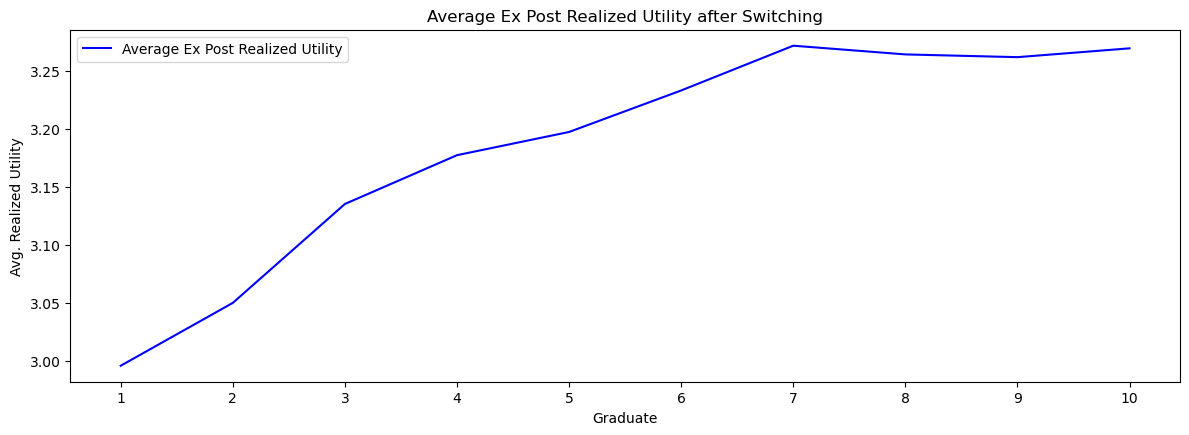

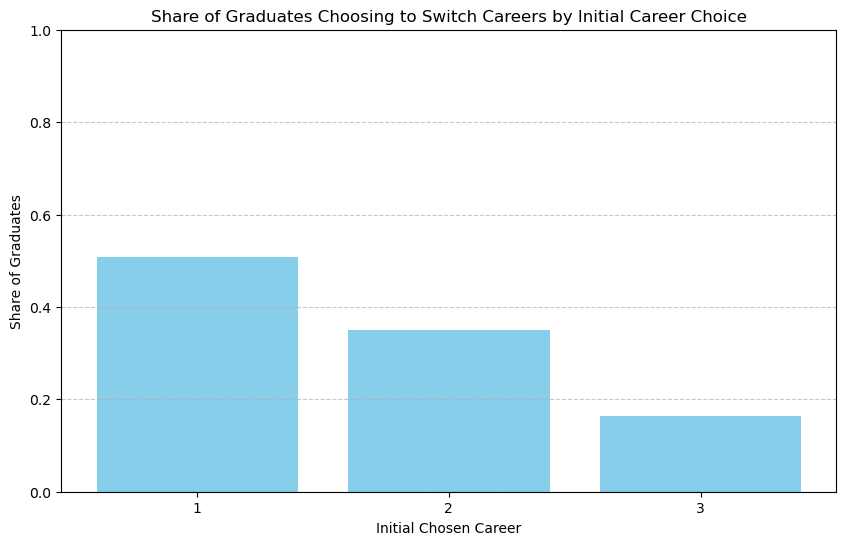

In [27]:
sim.visualize_results_with_switching()

It will only make sense to switch career track if the utility of another career track minus the switching cost $c=1$ is higher than the graduate's initial career track utiliy. The upper figure illustrates this, as the graphs are somewhat comparable to the corresponding grapgh in 3.2. The bottom figure illustrates that graduates make more informed decisions in year 2 after learning their own utility gievn their chosen career track. This increases the realised utility across all graduates.

We find that switching away from career track 1 is more common than switching away from career track 2, which is more common than switching away from career track 3. Intuitively, this makes sense as graduates initially working in 1 learning that this decision was suboptimal, and conversely for graduates in career track 3 who learn that their initial decision was optimal.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [10]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [11]:
# We extract our class from the py-file
from examproject import problem3

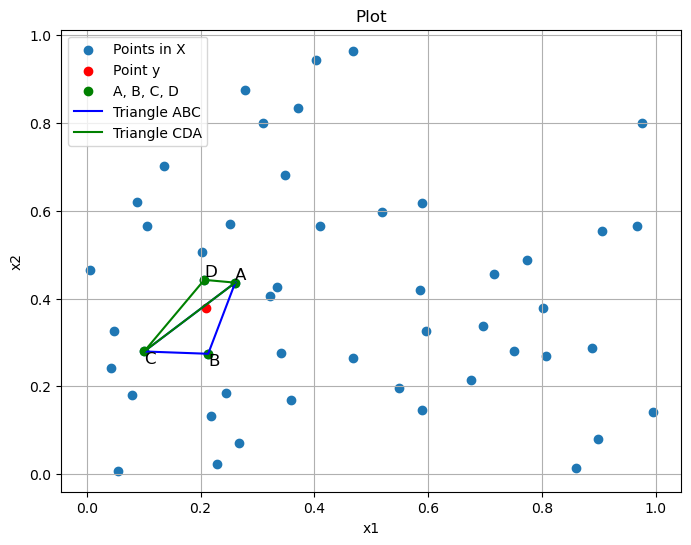

In [14]:
# We name the class 'problem'
problem = problem3(X,y)

# We call the plot-function
problem.plot()

We see the triangles in the plot above. y is shown as the red square. By the looks of it, the point y lies in the triangle ABC, on the very edge to CDA.   

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [13]:
# We call the function that solves the problem
problem.check_point_inside_triangle()

Point y is inside triangle ABC with barycentric coordinates (0.6286, 0.0691, 0.3023)
Point y is NOT inside triangle CDA with barycentric coordinates (0.3683, -0.1339, 0.7657)


Now we can conclude that y lies in the ABC triangle. Since the CDA triangle has an negative value (D = -0.1339) we can conclude that y lies inside the triangle ABC - the positive barycentric coordinates of ABC confirms that conclusion.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [32]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [33]:
# We call the function that solve the problem
problem.approx_vs_true()

Approximation of f(y): 0.084
True value of f(y):    0.079
Difference is -0.005


We see that the approximation finds the function to be 0.084 while the true value is 0.079. The difference being -0.005. This difference highlights the sensitivity of the algorithm's placement of points A, B, C, and D relative to y, which impacts the accuracy of the interpolated function value.

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [34]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [35]:
problem.last_one(Y)


Point y = (0.2, 0.2):
True value of f(y): 0.04
Approximated value of f(y): 0.04033

Point y = (0.8, 0.2):
True value of f(y): 0.16
Approximated value of f(y): 0.15874

Point y = (0.8, 0.8):
True value of f(y): 0.64
Approximated value of f(y): nan

Point y = (0.8, 0.2):
True value of f(y): 0.16
Approximated value of f(y): 0.15874

Point y = (0.5, 0.5):
True value of f(y): 0.25
Approximated value of f(y): 0.25129



We see once again that there is a small difference between the true value of y and the approximation used with help of the algorithm. 